In [6]:
import cv2
import numpy as np
import argparse

###########################################################################
## DOCS https://docs.opencv.org/3.4.10/d4/dee/tutorial_optical_flow.html ##
###########################################################################

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )

# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

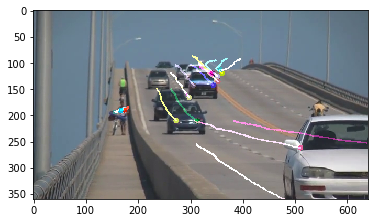

In [8]:
cap  = cv2.VideoCapture('../../DATA/slow_traffic_small.mp4')

ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)

color = np.random.randint(0,255,(100,3))
mask = np.zeros_like(old_frame)

while(1):
    
    ret, frame = cap.read()
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
    
    good_new = p1[st == 1]
    good_old = p0[st == 1]
    
    for i, (new, old) in enumerate(zip(good_new, good_old)):
        
        new_x, new_y = new.ravel()
        old_x, old_y = old.ravel()
        
        mask = cv2.line(mask, (new_x, new_y), (old_x, old_y), color[i].tolist(), 2)
        frame = cv2.circle(frame, (new_x, new_y), 5, color[i].tolist(), -1)
        
    image = cv2.add(frame, mask)
    cv2.imshow('frame', image)
    
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    k = cv2.waitKey(30) & 0xFF
    if k == 27:
        break
        
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1, 1, 2)

cv2.destroyAllWindows()
cap.release()